In [28]:
import subprocess
import os, sys
from IPython.display import Image, display
import logging

FORMAT = '%(asctime)s %(name)s %(funcName)s %(message)s'
log_level = logging.WARNING
logging.basicConfig(format=FORMAT, datefmt='%H:%M:%S',
                    level=log_level)

In [29]:
SIMULATE_DATASET = True
BONSAI = True
VISUALIZE = True

In [30]:
bonsai_path = '/scicore/home/nimwegen/degroo0000/Bonsai-data-representation'
simulation_path = os.path.join(bonsai_path, 'paper_figure_scripts_and_notebooks/simulating_datasets/simulate_equidistant_cells_diff_dims_cleaned.py')
run_bonsai_several_path = os.path.join(bonsai_path, 'paper_figure_scripts_and_notebooks/simulating_datasets/analyzing_simulated_datasets/run_bonsai_several_times_cleaned.py')
visualize_path = os.path.join(bonsai_path, 'paper_figure_scripts_and_notebooks/simulating_datasets/analyzing_simulated_datasets/SFig2_accuracy_increases_with_cells.py')

sys.path.append(bonsai_path)
os.chdir(bonsai_path)

## Define arguments:

In [31]:
num_dims = '100'
n_sampled_clsts = '100'
n_cells_per_clst = '20'
seed = '1231'
noise_var = '1.8'

## Run the different steps

In [32]:
if SIMULATE_DATASET:
    command1 = [simulation_path,
                '--input_dataset',
                'examples/example_data/baron.hdf',
                '--results_folder',
                'data/simulated_datasets/simulated_equidistant_test',
                '--num_dims',
                num_dims,
                '--n_sampled_clsts',
                n_sampled_clsts,
                '--n_cells_per_clst',
                n_cells_per_clst,
                '--random_times',
                'True',
                '--sample_umi_counts',
                'False',
                '--add_noise',
                'True',
                '--noise_var',
                noise_var,
                '--seed',
                seed]
    output1 = subprocess.run([sys.executable] + command1, stdout=subprocess.PIPE, text=True)
    # output1 = subprocess.run(command1, stdout=subprocess.PIPE, text=True)
    print(output1.stdout)
    print(output1.stderr)

Namespace(input_dataset='examples/example_data/baron.hdf', results_folder='data/simulated_datasets/simulated_equidistant_test', num_dims='100', n_sampled_clsts='100', n_cells_per_clst='20', random_times=True, sample_umi_counts=False, add_noise=True, seed=1231, noise_var=1.8)
Writing to path: /scicore/home/nimwegen/degroo0000/Bonsai-data-representation/data/simulated_datasets/simulated_equidistant_test/simulate_equidistant_100_clsts_2000_cells_100_dims_random_times_no_umi_counts_add_noise_1_seed_1231
Writing true deltas to file.
Writing true d_deltas to file.
Writing cell IDs to file:
Writing gene IDs to file:

None


In [ ]:
if BONSAI:
    command1 = [run_bonsai_several_path,
                '--input_folder',
                'data/simulated_datasets/simulated_equidistant_test',
                '--results_folder',
                'results/simulated_datasets/simulated_equidistant_test',
                '--num_dims',
                num_dims,
                '--n_sampled_clsts',
                n_sampled_clsts,
                '--n_cells_per_clst',
                n_cells_per_clst,
                '--random_times',
                'True',
                '--sample_umi_counts',
                'False',
                '--add_noise',
                'True',
                '--noise_var',
                noise_var,
                '--seed',
                seed]
    output1 = subprocess.run(['/scicore/home/nimwegen/degroo0000/miniconda3/envs/bonsai_ubuntu/bin/python'] + command1, capture_output=True, text=True)
    # output1 = subprocess.run(['/scicore/home/nimwegen/degroo0000/miniconda3/envs/bonsai_ubuntu/bin/python'] + command1, stdout=subprocess.PIPE, text=True)
    print(output1.stdout)
    print(output1.stderr)

In [50]:
if VISUALIZE:
    command1 = [visualize_path,
                '--input_folder',
                'data/simulated_datasets/simulated_equidistant_test',
                '--results_folder',
                'results/simulated_datasets/simulated_equidistant_test',
                '--num_dims',
                num_dims,
                '--n_sampled_clsts',
                n_sampled_clsts,
                '--n_cells_per_clst',
                n_cells_per_clst,
                '--random_times',
                'True',
                '--sample_umi_counts',
                'False',
                '--add_noise',
                'True',
                '--noise_var',
                noise_var,
                '--seed',
                seed]
    output1 = subprocess.run([sys.executable] + command1, capture_output=True, text=True)
    # output1 = subprocess.run(['/scicore/home/nimwegen/degroo0000/miniconda3/envs/bonsai_ubuntu/bin/python'] + command1, stdout=subprocess.PIPE, text=True)
    print(output1.stdout)
    print(output1.stderr)

Namespace(input_folder='data/simulated_datasets/simulated_equidistant_test', results_folder='results/simulated_datasets/simulated_equidistant_test', num_dims='100', n_sampled_clsts='100', n_cells_per_clst='1,2,5,10,20', random_times=True, sample_umi_counts=False, add_noise=True, seed=1231, noise_var=1.8, recalculate=False)
Finished loading dataset of type bonsai
Finished loading dataset of type delta_true
Finished loading dataset of type pca_2
Finished loading dataset of type umap_10
Comparing pairwise distances of dataset: 'bonsai'.
Comparing pairwise distances of dataset: 'pca_2'.
Comparing pairwise distances of dataset: 'umap_10'.
Finished loading dataset of type bonsai
Finished loading dataset of type delta_true
Finished loading dataset of type pca_2
Finished loading dataset of type umap_10
Comparing pairwise distances of dataset: 'bonsai'.
Comparing pairwise distances of dataset: 'pca_2'.
Comparing pairwise distances of dataset: 'umap_10'.
Finished loading dataset of type bonsai
F

useful_scripts_not_bonsai/simulating_datasets/analyzing_simulated_datasets/results/data/simulated_datasets/simulated_equidistant_test/SI_tree_better_at_more_cells_new.png


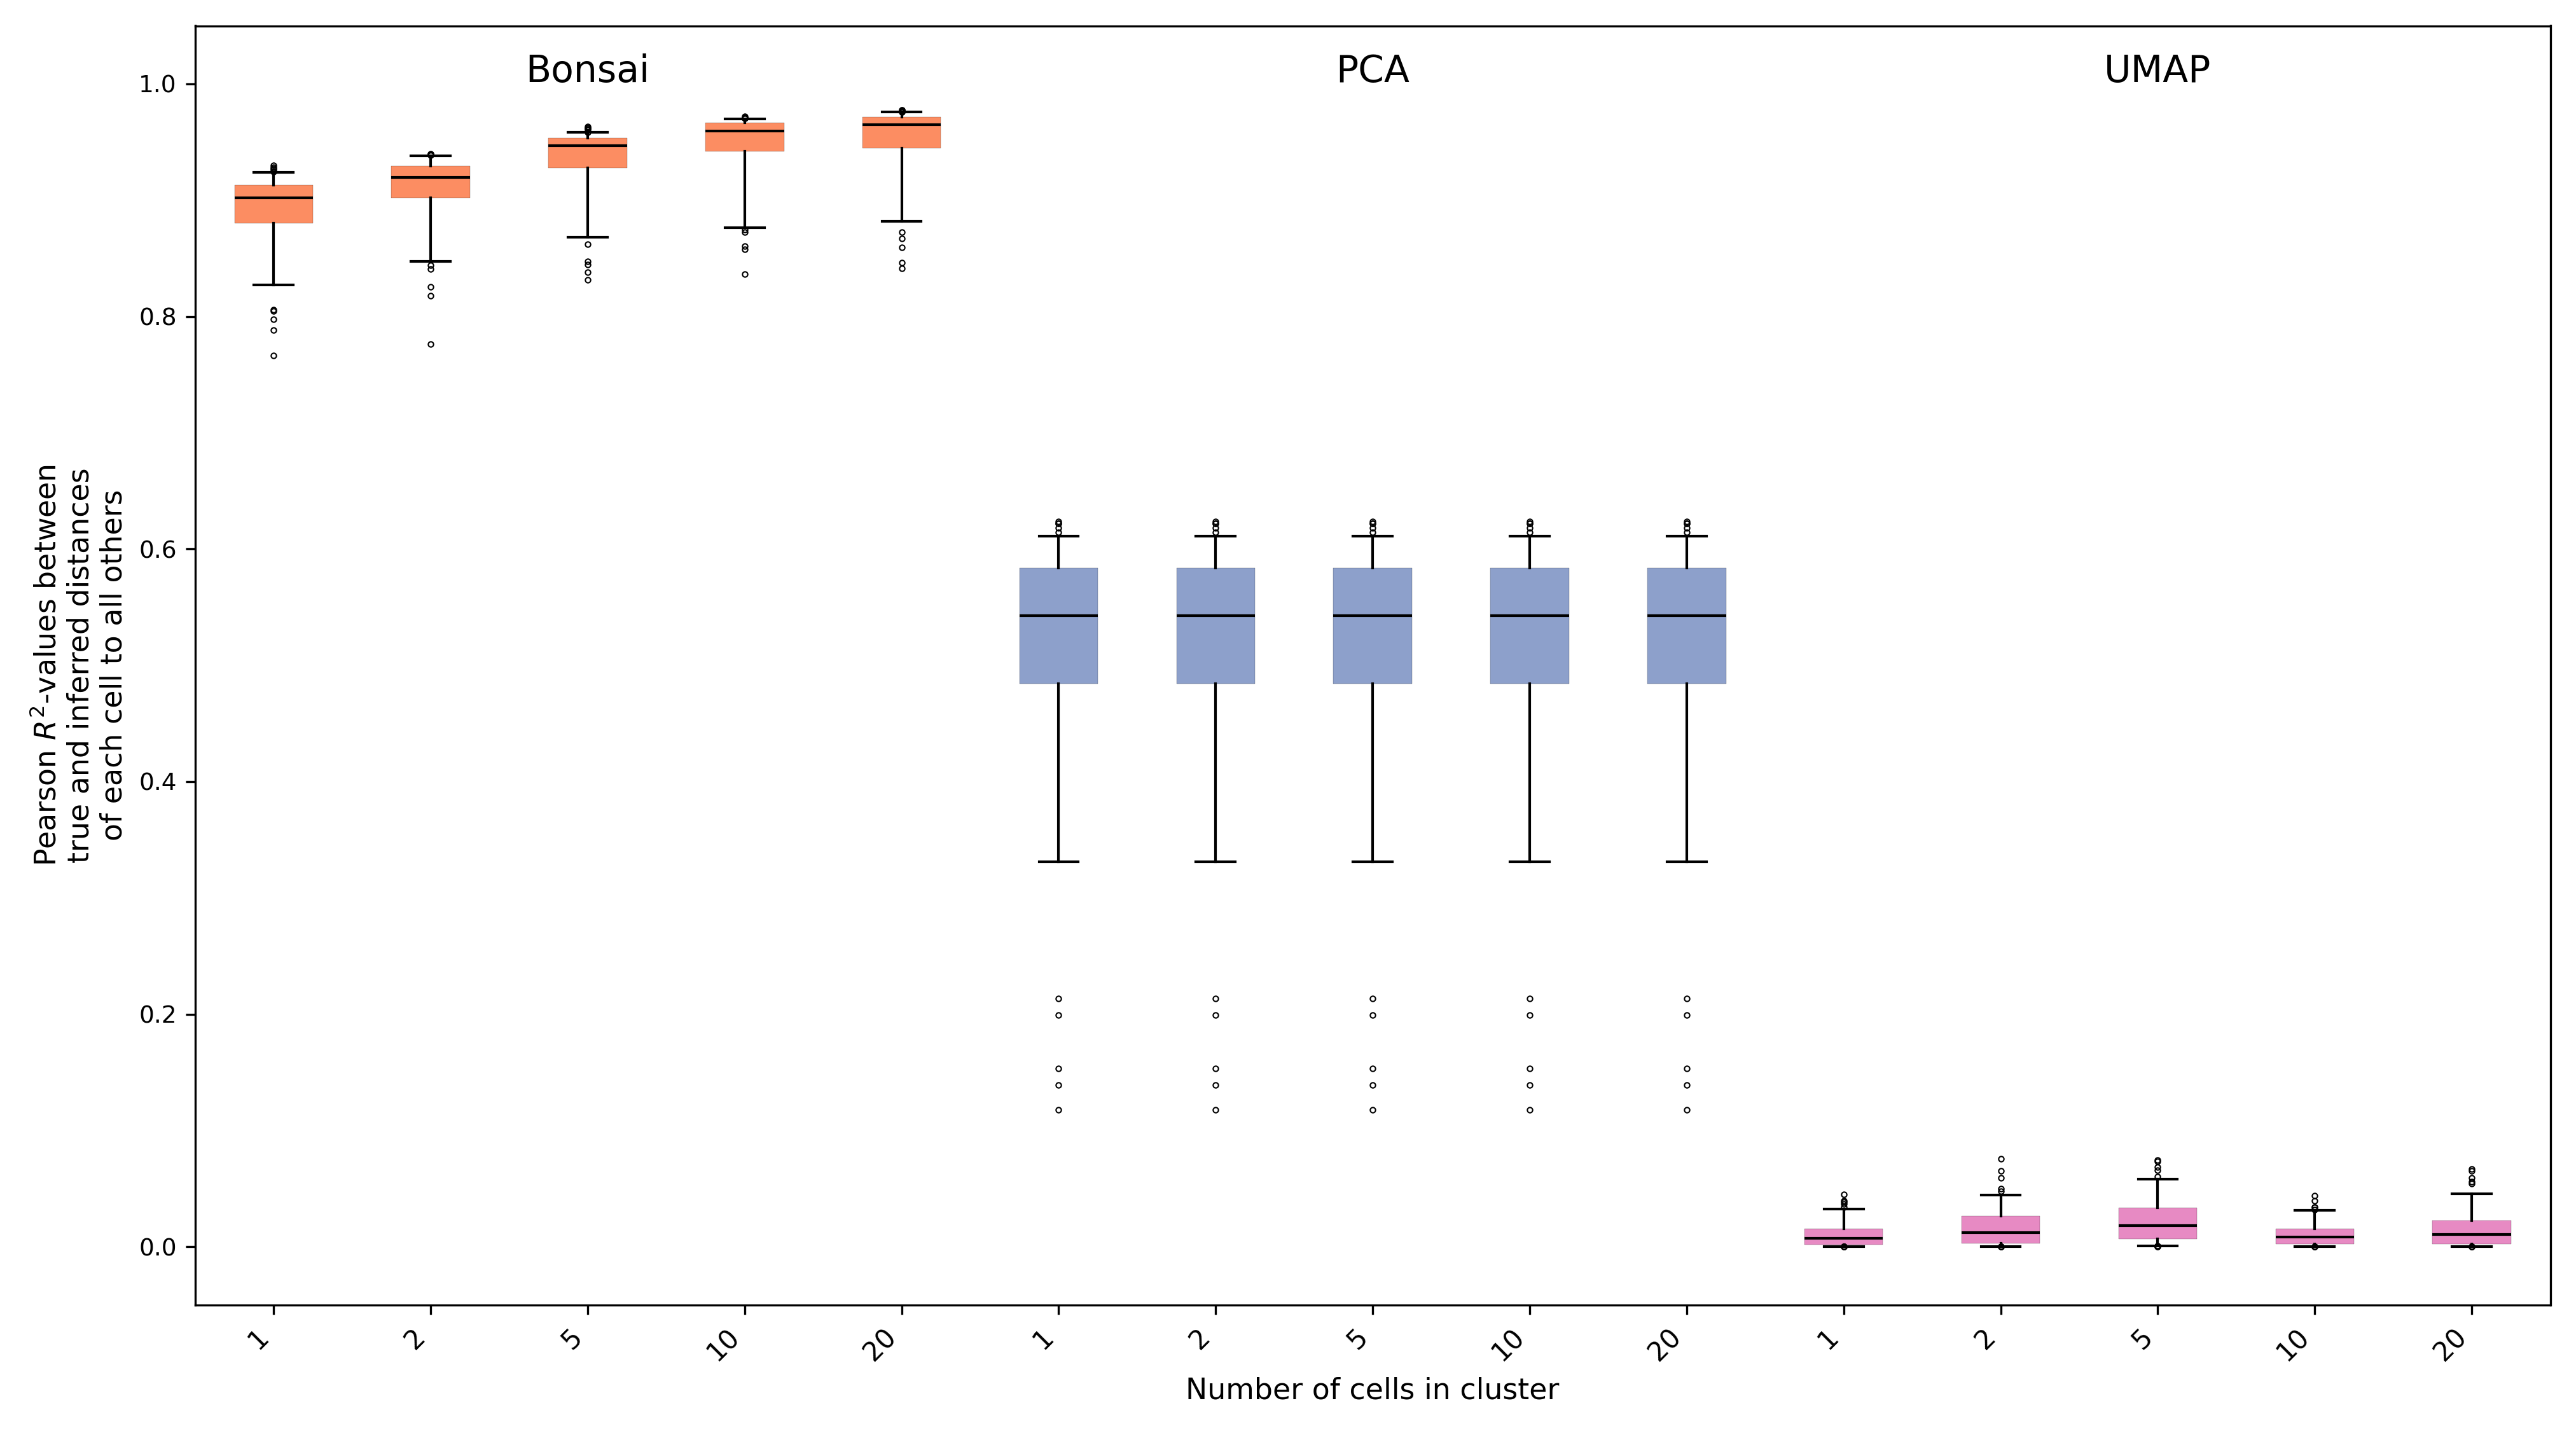

In [51]:
import re
if VISUALIZE:
    match = re.search(r"Stored the png-figure at (.+?\.png)", output1.stdout)
    if match:
        png_path = match.group(1)
        print(png_path)
        display(Image(filename=png_path))